# Final Project 2 - RainTomorrow

Group 3 :
- Jasmine Nur Ramadhani (PYTN-KS20-016)
- Faizal Azmi Nurwardani (PYTN-KS20-020)
- Afifah Yulfahazani (PYTN-KS20-07)

## Project Overview

Sumber : https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

Dataset yang digunakan dalam project ini merupakan dataset "Rain in Australia" yang didapatkan dari Kaggle. Dataset ini berisikan pengamatan cuaca harian selama sekitar 10 tahun dari banyak lokasi di Australia dan memiliki 23 fitur. 

Project ini bertujuan untuk memprediksi apakah akan terjadi hujan di hari berikutnya (Rain Tomorrow) atau tidak. 

Prediksi dilakukan dengan menerapkan konsep Classification, di mana di dalam project ini akan digunakan algoritma Logistic Regression dan Support Vector Machine (SVM). Bertujuan untuk memprediksi hujan hari berikutnya dengan melatih model klasifikasi pada variabel target "RainTomorrow".

# Import Library

In [1]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Data Loading


## Import data

In [2]:
data = pd.read_csv("dataset\weatherAUS.csv")

## Detail of dataset

In [3]:
print("Baris : ", data.shape[0])  # ukuran baris
print("Kolom : ", data.shape[1])  # ukuran kolom

Baris :  145460
Kolom :  23


Dataset memiliki 145460 baris hasil observasi dengan 23 fitur yang dapat dilihat pada hasil kode di bawah ini:

In [4]:
# Menampilkan 5 baris teratas 
pd.set_option("display.max.columns", None)     # Displaying maximum column
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [5]:
# Menampilkan 5 baris terbawah 
data.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
145455       NaN           E           31.0         SE        ENE   
145456       NaN         NNW           22.0         SE          N   
145457       NaN           N           37.0         SE        WNW   
145458       NaN          SE           28.0        SSE          N   
145459       NaN         NaN            NaN        ESE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
145455       1020.3       NaN       NaN     10.1     22.4        No   
145456       1019.1       NaN       NaN     10.9     24.5        No   
145457       1016.8       NaN       NaN     12.5     26.1        No   
145458       1016.5       3.0       2.0     15.1     26.0        No   
145459       1017.9       8.0       8.0     15.0     20.9        No   

       RainTomorrow  
145455           No  
145456           No  
145457           No  
145458           No  
145459          NaN

In [6]:
# Menampilkan fitur-fitur pada dataset
col_names = data.columns
col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
# Menampilkan informasi (tipe data dan jumlah non-null) untuk tiap fitur
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Berdasarkan informasi-informasi yang telah didapatkan di atas, dapat diketahui bahwa data yang digunakan terdiri dari 145460 baris dan 23 kolom. 

Tipe data yang terdapat dalam data ini adalah 7 kolom yang memiliki tipe data object dan 16 kolom yang memiliki tipe data float.
Selain itu, dapat dilihat pada bagian Non-null count bahwa hanya kolom Date dan Location yang berisi 145460 data tidak null (sebanyak baris yang dimiliki data). Sedangkan untuk kolom lainnya masih berisikan data null atau missing value.

Dengan begitu, pada proses selanjutnya akan dilakukan pembersihan data untuk mengatasi missing value.

# Data Cleaning & Data Preprocessing 1

## Check for missing value 

In [8]:
# Cek untuk missing values
data.isnull().values.any()

True

In [9]:
# Cek untuk data duplikat
data.duplicated().sum()

0

Dari informasi di atas, dapat diketahui bahwa tidak terdapat data duplikat. Namun, terdapat data null. Selanjutnya, mari kita lihat jumlah dari data null pada tiap kolom

In [10]:
# Cek untuk missing values
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

## Grouping Categorical and Numerical Features

Selanjutnya, akan di-grouping berdasarkan tipe data object dan tipe data selain object

In [11]:
# Grouping untuk fitur-fitur dengan tipe data object
categorical_ft = [column for column in data.columns if data[column].dtype == "O"]
print("Numbers of Categorical Features: {}".format(len(categorical_ft)))
print("Categorical Features: ",categorical_ft)

Numbers of Categorical Features: 7
Categorical Features:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Ada sebanyak 7 fitur kategorikal, yaitu 'Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'. 

Selanjutnya, kita akan melihat kardinalitas dari fitur-fitur kategorikal

In [12]:
# Grouping untuk fitur-fitur dengan tipe data selain object
numerical_ft = [column for column in data.columns if data[column].dtype != "O"]
print("Number of Numerical Features: {}".format(len(numerical_ft)))
print("Numerical Features: ",numerical_ft)

Number of Numerical Features: 16
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


## Check for Cardinality of Categorical Features

Akan dicek kardinalitas dari masing-masing fitur kategorikal dengan melihat banyak unique values-nya

In [13]:
for each_feature in categorical_ft:
   unique_values = len(data[each_feature].unique())
   print("Cardinality of {} are: {}".format(each_feature, unique_values))

Cardinality of Date are: 3436
Cardinality of Location are: 49
Cardinality of WindGustDir are: 17
Cardinality of WindDir9am are: 17
Cardinality of WindDir3pm are: 17
Cardinality of RainToday are: 3
Cardinality of RainTomorrow are: 3


Kolom 'Date' memiliki kardinalitas yang tinggi dengan unique values sebanyak 3436. Kardinalitas yang tinggi dapat berpengaruh kepada model. Karenanya, kolom 'Date' akan diproses dan dimanipulasi menjadi berdasarkan tanggal pada kolom 'Date', bulan pada kolom 'month', dan tahun pada kolom 'year'

In [14]:
# mengubah format kolom 'Date' menjadi datetime
data["Date"] = pd.to_datetime(data["Date"])     

# melakukan feature engineering
data["year"] = data["Date"].dt.year
data["month"] = data["Date"].dt.month
data["day"] = data["Date"].dt.day

data.sample()

Date     Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
51643 2016-05-03  Tuggeranong      4.3     17.9       0.0          NaN   

       Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
51643       NaN          NW           56.0         NW        WNW   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
51643          17.0          26.0         57.0         41.0       1011.2   

       Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
51643       1007.1       NaN       NaN     13.1     17.7        No   

      RainTomorrow  year  month  day  
51643           No  2016      5    3

Kemudian drop kolom 'Date' setelah proses feature engineering dilakukan

In [15]:
data.drop("Date", axis = 1, inplace = True)
data.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          W        WNW          20.0          24.0   
1           44.0        NNW        WSW           4.0          22.0   
2           46.0          W        WSW          19.0          26.0   
3           24.0         SE          E          11.0           9.0   
4           41.0        ENE         NW           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1       8.0       NaN   
1         44.0         25.0       1010.6       1007.8       NaN       NaN   
2         38.0         30.0       1007.6       1008.7       NaN       2.0   
3         45.0         16.0       1017.6       1012.8       NaN       NaN   
4         82.0         33.0       1010.8       1006.0       7.0       8.0   

   Temp9am  Temp3pm RainToday RainTomorrow  year  month  day  
0     16.9     21.8        No           No  2008     12    1  
1     17.2     24.3        No           No  2008     12    2  
2     21.0     23.2        No           No  2008     12    3  
3     18.1     26.5        No           No  2008     12    4  
4     17.8     29.7        No           No  2008     12    5

Setelah drop kolom 'Date', Kita simpan kembali categorical features pada dataset di dalam categorical_ft

In [16]:
categorical_ft = [column for column in data.columns if data[column].dtype == "O"]
print("Numbers of Categorical Features: {}".format(len(categorical_ft)))
print("Categorical Features: ",categorical_ft)

Numbers of Categorical Features: 6
Categorical Features:  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [17]:
# Mengidentifikasi unique values untuk categorical features
for column in categorical_ft :
    print(f"Unique values for {column}: {data[column].unique()}")


Unique values for Location: ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
Unique values for WindGustDir: ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
Unique values for WindDir9am: ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
Unique values for WindDir3pm: ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
Unique values for RainToday

## Handling Missing Values

### Handling missing values for categorical feature

Seperti yang diketahui dari penjabaran sebelumnya, kolom "RainToday" dan kolom target prediksi "RainTomorrow" berisikan ["No", "Yes", nan]. Maka selanjutnya, nan pada "RainToday" dan "RainTomorrow" akan di-drop

In [18]:
# Menghapus data null pada "RainToday" dan "RainTomorrow"
data.dropna(subset=["RainToday","RainTomorrow"], inplace=True)

In [19]:
# cek untuk banyak missing values pada categorical features
data[categorical_ft].isnull().sum()

Location           0
WindGustDir     9163
WindDir9am      9660
WindDir3pm      3670
RainToday          0
RainTomorrow       0
dtype: int64

Kolom 'Location', 'RainToday', dan 'RainTomorrow' sudah tidak memiliki missing values. Selanjutnya, akan diisi kolom 'WindGustDir', 'WindDir9am', dan 'WindDir3pm' dengan mode atau yang paling sering muncul


In [20]:
fill_cat = SimpleImputer(strategy="most_frequent")

data[categorical_ft] = fill_cat.fit_transform(data[categorical_ft])

In [21]:
# cek kembali untuk banyak missing values pada categorical features
data[categorical_ft].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

Karena fitur-fitur kategorical sudah tidak terdapat data null maka selanjutnya kita akan memproses fitur-fitur numerical

### Handling missing values for numerical features

In [22]:
# cek jumlah dan persentase missing values pada fitur-fitur numerik
numerical_miss = (pd.DataFrame({"Missing_Value":data[numerical_ft].isnull().sum(), 
                         "Percent":data[numerical_ft].apply(lambda x: f'{((x.isnull().sum()/data[numerical_ft].shape[0])*100).round(2)} %')})).sort_values(by="Missing_Value", ascending=False)
numerical_miss 

Missing_Value  Percent
Sunshine               66805  47.45 %
Evaporation            59694   42.4 %
Cloud3pm               56094  39.84 %
Cloud9am               52625  37.38 %
Pressure3pm            13769   9.78 %
Pressure9am            13743   9.76 %
WindGustSpeed           9105   6.47 %
Humidity3pm             3501   2.49 %
Temp3pm                 2624   1.86 %
WindSpeed3pm            2531    1.8 %
Humidity9am             1517   1.08 %
WindSpeed9am            1055   0.75 %
Temp9am                  656   0.47 %
MinTemp                  468   0.33 %
MaxTemp                  307   0.22 %
Rainfall                   0    0.0 %

<Axes: >

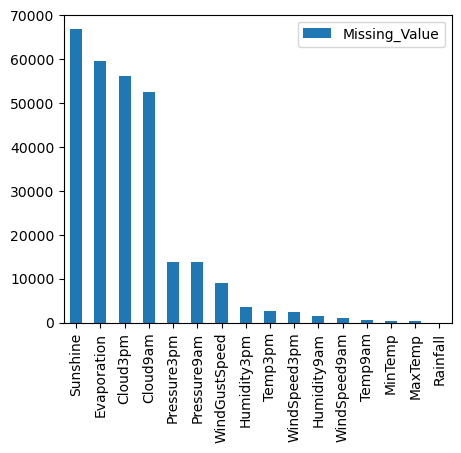

In [23]:
# plot berdasarkan banyaknya missing values pada numerical_ft
numerical_miss.plot(kind='bar', figsize=(5,4))

Selanjutnya, missing values pada fitur-fitur numerical akan diisi menggunakan SimpleImputer dari library scikit-learn menggunakan strategy "mean" atau rata-rata. Namun sebelum itu, akan dilakukan pengecekan dan pemrosesan outliers pada numerical_ft

#### Remove Outlier from Numerical Features

In [24]:
print(round(data[numerical_ft].describe()))

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  140319.0  140480.0  140787.0      81093.0   73982.0       131682.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      139732.0      138256.0     139270.0     137286.0     127044.0   
mean           14.0          19.0         69.0         51.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

Berdasarkan informasi yang didapatkan di atas, kita dapat melihat bahwa pada kolom 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', dan 'WindSpeed3pm' memiliki outliers lebih banyak dibandingkan kolom lain.

Text(0, 0.5, 'WindSpeed3pm')

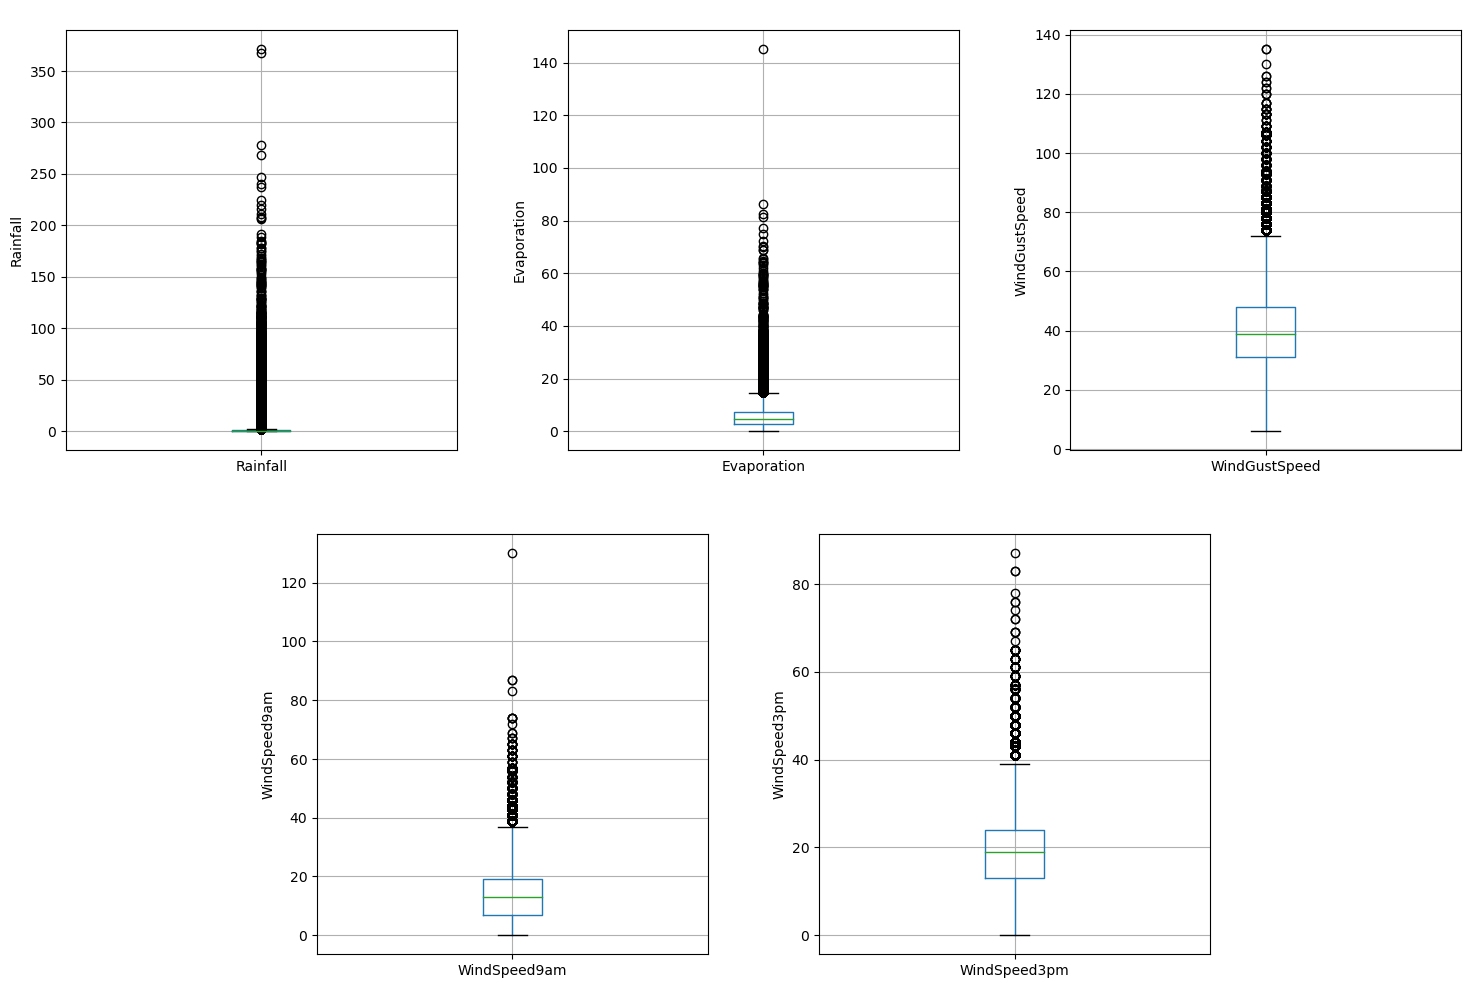

In [25]:
# Visualisasi outliers dengan boxplot

plt.figure(figsize=(18,12))
plt.subplots_adjust(hspace=0.2, wspace=0.8)

ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
fig = data.boxplot(column="Rainfall")
fig.set_title(" ")
fig.set_ylabel("Rainfall")

ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
fig = data.boxplot(column="Evaporation")
fig.set_title("")
fig.set_ylabel("Evaporation")

ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
fig = data.boxplot(column="WindGustSpeed")
fig.set_title("")
fig.set_ylabel("WindGustSpeed")

ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
fig = data.boxplot(column="WindSpeed9am")
fig.set_title("")
fig.set_ylabel("WindSpeed9am")

ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
fig = data.boxplot(column="WindSpeed3pm")
fig.set_title("")
fig.set_ylabel("WindSpeed3pm")

Dapat dilihat pada boxplot di atas bahwa terdapat banyak outliers pada 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', dan 'WindSpeed3pm'.

Selanjutnya, akan dilihat apakah kelima variabel tersebut memiliki skewness atau berdistribusi normal 

Text(0, 0.5, 'RainTomorrow')

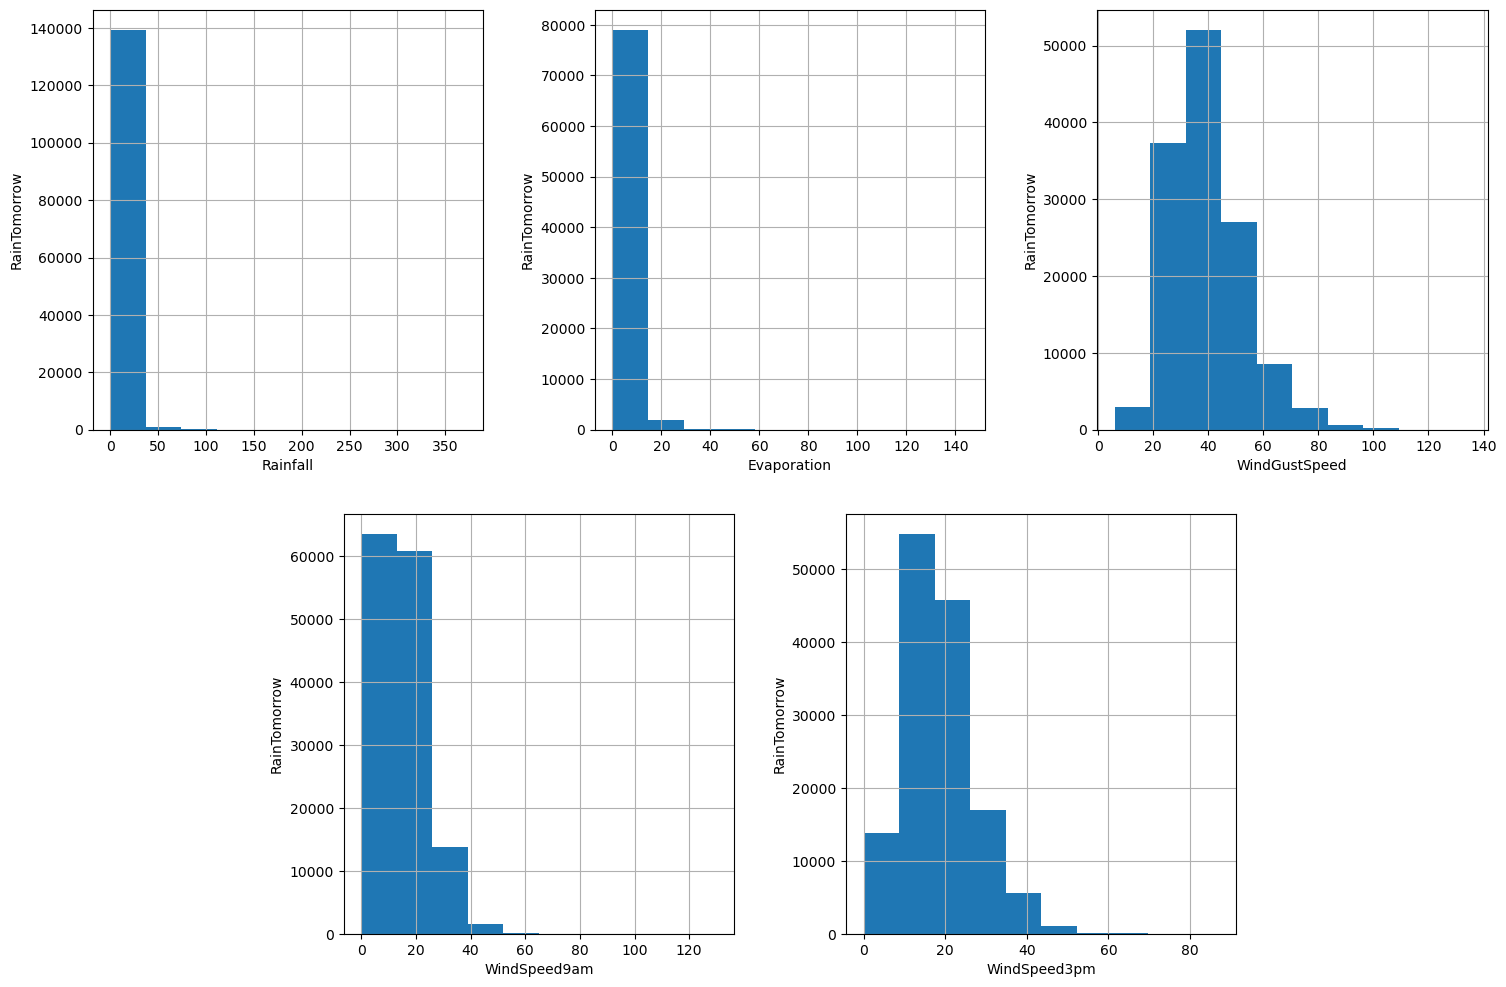

In [26]:
# Visualisasi outliers dengan histogram

plt.figure(figsize=(18,12))
plt.subplots_adjust(hspace=0.2, wspace=0.8)

ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
fig = data.Rainfall.hist(bins=10)
fig.set_xlabel("Rainfall")
fig.set_ylabel("RainTomorrow")

ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
fig = data.Evaporation.hist(bins=10)
fig.set_xlabel("Evaporation")
fig.set_ylabel("RainTomorrow")

ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
fig = data.WindGustSpeed.hist(bins=10)
fig.set_xlabel("WindGustSpeed")
fig.set_ylabel("RainTomorrow")

ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
fig = data.WindSpeed9am.hist(bins=10)
fig.set_xlabel("WindSpeed9am")
fig.set_ylabel("RainTomorrow")

ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
fig = data.WindSpeed3pm.hist(bins=10)
fig.set_xlabel("WindSpeed3pm")
fig.set_ylabel("RainTomorrow")

Kelima variabel berdistribusi miring maka akan digunakan Interquartile Range (IQR) untuk proses penanganan outliers 

In [27]:
features_with_outliers = ["Rainfall", "Evaporation", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm"]
for feature in features_with_outliers:
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    data.loc[data[feature]<lower_limit,feature] = lower_limit
    data.loc[data[feature]>upper_limit,feature] = upper_limit

In [28]:
print(round(data[numerical_ft].describe()))

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  140319.0  140480.0  140787.0      81093.0   73982.0       131682.0   
mean       12.0      23.0       0.0          5.0       8.0           40.0   
std         6.0       7.0       1.0          3.0       4.0           13.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0       2.0         15.0      14.0           74.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      139732.0      138256.0     139270.0     137286.0     127044.0   
mean           14.0          19.0         69.0         51.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

Setelah dilakukan proses untuk menghilangkan ouliers dari fitur-fitur numerik pada `numerical_ft`. Selanjutnya, missing value pada `numerical_ft` akan diisi menggunakan SimpleImputer dari library scikit-learn menggunakan strategy 'mean' atau rata-rata.

In [29]:
from sklearn.impute import SimpleImputer

fill_num = SimpleImputer(strategy="mean")

data[numerical_ft] = fill_num.fit_transform(data[numerical_ft])


In [30]:
# cek kembali null data pada numerical features
data[numerical_ft].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

Dengan demikian, proses data cleaning dan data processing 1 telah selesai.

Setelah itu, copy data yang telah dibersihkan dan diproses ke `df`

In [31]:
# copy dataset
df = data.copy()

# Exploratory Data Analysis

## Descriptive statistics

Berikut statistik deskriptif dari dataset yang digunakan, untuk masing-masing tipe data

In [32]:
# descriptive statistics dengan mengecualikan tipe data object
data.describe(exclude=[object]).T

count         mean        std     min         25%  \
MinTemp        140787.0    12.184824   6.393226    -8.5     7.60000   
MaxTemp        140787.0    23.235120   7.106739    -4.8    17.90000   
Rainfall       140787.0     0.485723   0.791851     0.0     0.00000   
Evaporation    140787.0     5.323826   2.594404     0.0     4.00000   
Sunshine       140787.0     7.630540   2.741390     0.0     7.63054   
WindGustSpeed  140787.0    39.776750  12.537428     6.0    31.00000   
WindSpeed9am   140787.0    13.901168   8.554250     0.0     7.00000   
WindSpeed3pm   140787.0    18.543224   8.444519     0.0    13.00000   
Humidity9am    140787.0    68.826833  18.960664     0.0    57.00000   
Humidity3pm    140787.0    51.449288  20.546968     0.0    37.00000   
Pressure9am    140787.0  1017.654577   6.749189   980.5  1013.50000   
Pressure3pm    140787.0  1015.257963   6.682526   977.1  1011.00000   
Cloud9am       140787.0     4.431161   2.284253     0.0     3.00000   
Cloud3pm       140787.0     4.499250   2.109458     0.0     4.00000   
Temp9am        140787.0    16.987066   6.480860    -7.2    12.30000   
Temp3pm        140787.0    21.693183   6.872826    -5.4    16.70000   
year           140787.0  2012.757492   2.542272  2007.0  2011.00000   
month          140787.0     6.403482   3.426583     1.0     3.00000   
day            140787.0    15.714704   8.798882     1.0     8.00000   

                       50%     75%     max  
MinTemp          12.000000    16.8    33.9  
MaxTemp          22.700000    28.2    48.1  
Rainfall          0.000000     0.8     2.0  
Evaporation       5.323826     5.4    14.6  
Sunshine          7.630540     8.7    14.5  
WindGustSpeed    39.000000    46.0    73.5  
WindSpeed9am     13.000000    19.0    37.0  
WindSpeed3pm     18.543224    24.0    40.5  
Humidity9am      70.000000    83.0   100.0  
Humidity3pm      51.449288    65.0   100.0  
Pressure9am    1017.654577  1021.8  1041.0  
Pressure3pm    1015.257963  1019.4  1039.6  
Cloud9am          4.431161     6.0     9.0  
Cloud3pm          4.499250     6.0     9.0  
Temp9am          16.800000    21.5    40.2  
Temp3pm          21.300000    26.3    46.7  
year           2013.000000  2015.0  2017.0  
month             6.000000     9.0    12.0  
day              16.000000    23.0    31.0


Dari statistik deskriptif di atas, kita mengetahui bahwa:
- MinTemp memiliki suhu minimum antara -8.5 hingga 33.9 
- Pada MaxTemp, Suhu terpanas berada pada suhu 48.1 derajat

In [33]:
# descriptive statistics untuk tipe data object
data.describe(include=[object]).T

count unique       top    freq
Location      140787     49  Canberra    3402
WindGustDir   140787     16         W   18859
WindDir9am    140787     16         N   20926
WindDir3pm    140787     16        SE   14248
RainToday     140787      2        No  109332
RainTomorrow  140787      2        No  109586

Dari statistik deskriptif untuk tipe data object, kita dapat mengetahui banyak data, jumlah unique, modus, dan frekuensi dari modus pada tiap fitur. 
Dari data di atas, dapat diketahui bahwa:
- Baik pada RainToday maupun RainTomorrow memiliki lebih banyak nilai `No` atau tidak terjadi hujan
- Terdapat 49 lokasi dengan pencatatan paling banyak di Canberra



## Exploring Target Variable

In [34]:
# Mengubah nilai dari "Yes" dan "No" menjadi 1 atau 0
df["RainToday"] = df["RainToday"].map({"No": 0, "Yes": 1})
df["RainTomorrow"] = df["RainTomorrow"].map({"No": 0, "Yes": 1})

df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6     5.323826   7.63054           W   
1   Albury      7.4     25.1       0.0     5.323826   7.63054         WNW   
2   Albury     12.9     25.7       0.0     5.323826   7.63054         WSW   
3   Albury      9.2     28.0       0.0     5.323826   7.63054          NE   
4   Albury     17.5     32.3       1.0     5.323826   7.63054           W   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          W        WNW          20.0          24.0   
1           44.0        NNW        WSW           4.0          22.0   
2           46.0          W        WSW          19.0          26.0   
3           24.0         SE          E          11.0           9.0   
4           41.0        ENE         NW           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1  8.000000   4.49925   
1         44.0         25.0       1010.6       1007.8  4.431161   4.49925   
2         38.0         30.0       1007.6       1008.7  4.431161   2.00000   
3         45.0         16.0       1017.6       1012.8  4.431161   4.49925   
4         82.0         33.0       1010.8       1006.0  7.000000   8.00000   

   Temp9am  Temp3pm  RainToday  RainTomorrow  year  month  day  
0     16.9     21.8          0             0  2008     12    1  
1     17.2     24.3          0             0  2008     12    2  
2     21.0     23.2          0             0  2008     12    3  
3     18.1     26.5          0             0  2008     12    4  
4     17.8     29.7          0             0  2008     12    5

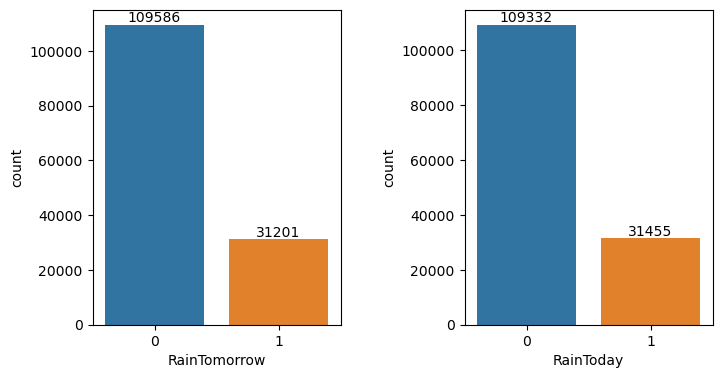

In [35]:
# Visualisasi RainTomorrow

plt.figure(figsize=(8,9))
plt.subplots_adjust(wspace=0.5)

plt.subplot(2, 2, 1)
ax1 = sns.countplot(x=df["RainTomorrow"])
for i in ax1.containers:
    ax1.bar_label(i,)

plt.subplot(2, 2, 2)
ax2 = sns.countplot(x=df["RainToday"])
for i in ax2.containers:
    ax2.bar_label(i,)

Dari visualisasi di atas, didapatkan informasi bahwa:
- variabel target `'RainTomorrow'` memiliki lebih banyak nilai `No`, yaitu sebanyak 109586 dibandingkan nilai `Yes` yang berjumlah 31201. 
- variabel `'RainToday'` juga memiliki lebih banyak nilai `No`, yaitu sebanyak 109332 dibandingkan nilai `Yes` yang berjumlah 31455. 

## Frequency Counts of Categorical

In [36]:
# Melihat 5 baris teratas dari categorical_ft
df[categorical_ft].head()

Location WindGustDir WindDir9am WindDir3pm  RainToday  RainTomorrow
0   Albury           W          W        WNW          0             0
1   Albury         WNW        NNW        WSW          0             0
2   Albury         WSW          W        WSW          0             0
3   Albury          NE         SE          E          0             0
4   Albury           W        ENE         NW          0             0

In [37]:
# Melihat frekuensi dari variabel kategorikal 
for var in categorical_ft: 
    print(df[var].value_counts())

Location
Canberra            3402
Sydney              3331
Perth               3193
Darwin              3192
Hobart              3183
Brisbane            3132
Bendigo             3030
Townsville          3027
AliceSprings        3025
MountGambier        3022
Launceston          3020
Adelaide            3020
Ballarat            3017
PerthAirport        3009
MelbourneAirport    3009
Mildura             3005
SydneyAirport       3001
Albany              2996
Nuriootpa           2996
Sale                2992
Albury              2991
Watsonia            2990
Woomera             2984
Portland            2984
Cobar               2980
Cairns              2964
Tuggeranong         2959
WaggaWagga          2958
NorfolkIsland       2944
Wollongong          2943
SalmonGums          2941
CoffsHarbour        2940
Dartmoor            2939
Newcastle           2929
Witchcliffe         2924
GoldCoast           2924
Penrith             2911
Richmond            2906
NorahHead           2888
BadgerysCreek   

Dapat dilihat di atas mengenai masing-masing frekuensi values dari fitur-fitur kategorikal

## Rainfall by Month

Fitur 'Rainfall' merupakan jumlah curah hujan (mm). Kita akan melihat hubungan antara jumlah curah hujan dengan bulan

In [38]:
# Menyimpan data rata-rata "Rainfall" berdasarkan "month"
rainfall_month = df.groupby(["month"])[["Rainfall"]].agg("mean")
rainfall_month

Rainfall
month          
1      0.405829
2      0.445298
3      0.469802
4      0.471026
5      0.486931
6      0.572361
7      0.589468
8      0.547399
9      0.495928
10     0.428659
11     0.454554
12     0.459096

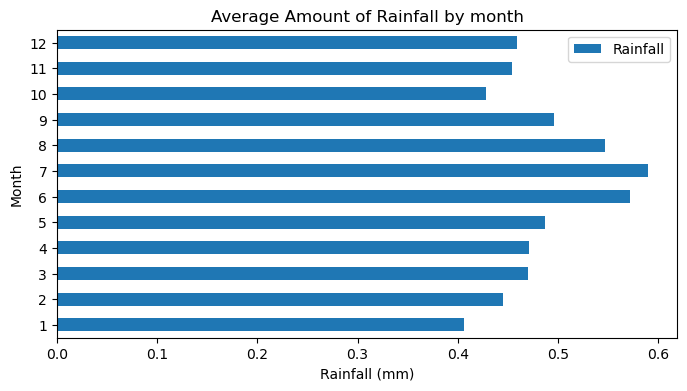

In [39]:
rainfall_month.plot(kind="barh", figsize=(8,4))

plt.title("Average Amount of Rainfall by month")
plt.ylabel("Month")
plt.xlabel("Rainfall (mm)")
plt.show()

Pada bulan ke-6 (Juni), 7 (Juli), dan 8 (Agustus) memiliki rata-rata curah hujan yang lebih tinggi dibandingkan bulan-bulan lainnya

## Amount of RainToday for each Location in Australia

In [40]:
import plotly.express as px


sns.set_style("dark")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (10, 6)
matplotlib.rcParams["figure.facecolor"] = "White"
px.histogram(data,x="Location", title="Location Vs RainToday", color="RainToday")

Untuk visualisai di atas:
- Warna biru untuk No pada RainToday
- warna merah untuk Yes pada RainToday
- Jumlah No dan Yes pada tiap location untuk RainToday


##  RainTomorrow vs Location & RainTomorrow vs month

In [41]:
# Menyimpan data rata-rata "RainTomorrow" berdasarkan "Location"
raintomorrow_loc = df.groupby(["Location"])[["RainTomorrow"]].agg("mean").sort_values(by="RainTomorrow", ascending=True)

# Menyimpan data rata-rata "RainTomorrow" berdasarkan "month"
raintomorrow_month = df.groupby(["month"])[["RainTomorrow"]].agg("mean")

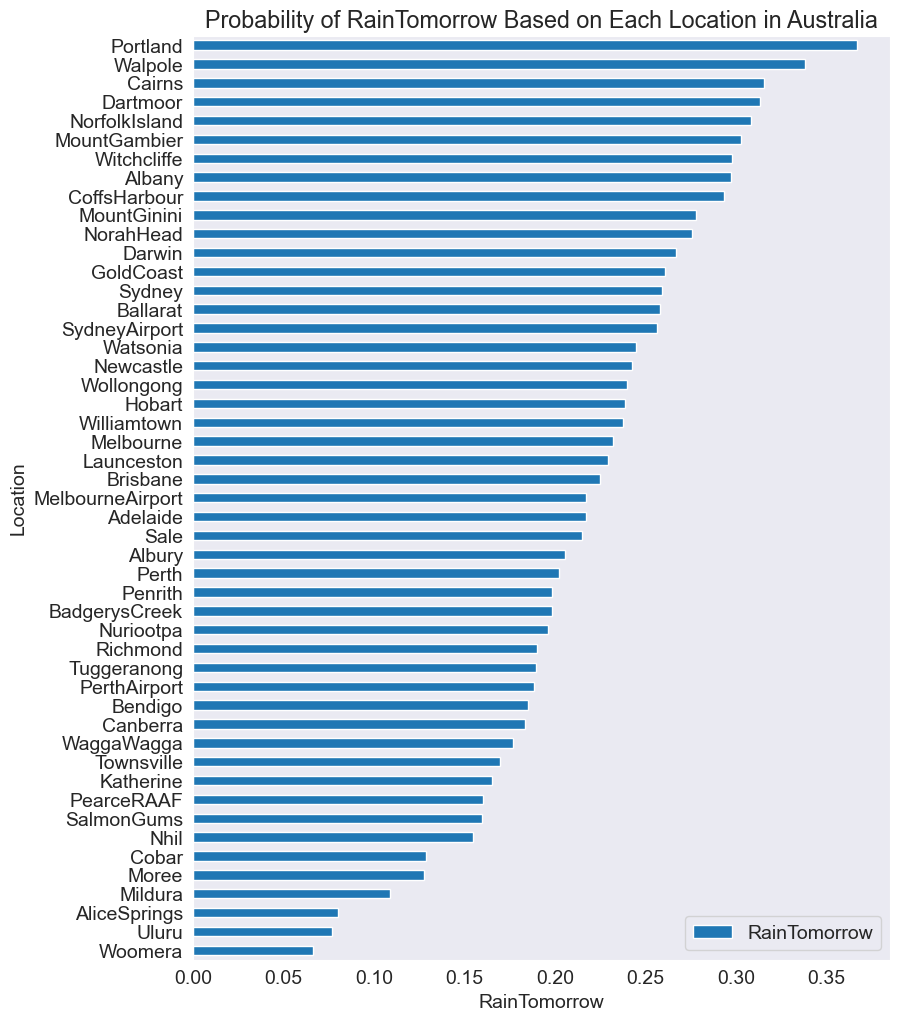

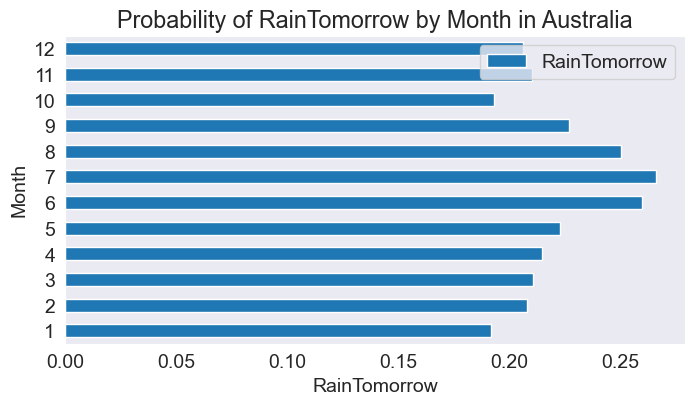

In [42]:
raintomorrow_loc.plot(kind="barh", figsize=(9,12))

plt.title("Probability of RainTomorrow Based on Each Location in Australia")
plt.ylabel("Location")
plt.xlabel("RainTomorrow")
plt.show()

raintomorrow_month.plot(kind="barh", figsize=(8,4))

plt.title("Probability of RainTomorrow by Month in Australia")
plt.ylabel("Month")
plt.xlabel("RainTomorrow")
plt.show()

Dari kedua visualisai di atas diketahui bahwa:
- Wilayah Portland, Walpole, Cairns memiliki kemungkinan hujan lebih tinggi dibandingkan dengan wilayah lainnya. 
- Bulan ke-6 (Juni), 7 (Juli), dan 8 (Agustus) juga memiliki kemungkinan frekuensi hujan lebih tinggi dibandingkan bulan lainnya, di mana rata-rata curah hujan juga lebih tinggi pada ketiga bulan tersebut.

## Correlation

Sebelum melihat korelasi dari masing-masing variabel, akan diubah non-numerical label menjadi numerical label dengan LabelEncoder()

In [43]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Mengubah non-numerical label menjadi numerical label
df["Location"] = label_encoder.fit_transform(df["Location"])
df["WindGustDir"] = label_encoder.fit_transform(df["WindGustDir"])
df["WindDir9am"] = label_encoder.fit_transform(df["WindDir9am"])
df["WindDir3pm"] = label_encoder.fit_transform(df["WindDir3pm"])

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       140787 non-null  int32  
 1   MinTemp        140787 non-null  float64
 2   MaxTemp        140787 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    140787 non-null  float64
 5   Sunshine       140787 non-null  float64
 6   WindGustDir    140787 non-null  int32  
 7   WindGustSpeed  140787 non-null  float64
 8   WindDir9am     140787 non-null  int32  
 9   WindDir3pm     140787 non-null  int32  
 10  WindSpeed9am   140787 non-null  float64
 11  WindSpeed3pm   140787 non-null  float64
 12  Humidity9am    140787 non-null  float64
 13  Humidity3pm    140787 non-null  float64
 14  Pressure9am    140787 non-null  float64
 15  Pressure3pm    140787 non-null  float64
 16  Cloud9am       140787 non-null  float64
 17  Cloud3pm       140787 non-null  fl

In [44]:
# Melihat korelasi antar dua fitur pada numerical_ft
df.corr()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
Location       1.000000 -0.005847 -0.020220 -0.003328     0.026063  0.001769   
MinTemp       -0.005847  1.000000  0.734443  0.051770     0.408649  0.052123   
MaxTemp       -0.020220  0.734443  1.000000 -0.258433     0.506452  0.332758   
Rainfall      -0.003328  0.051770 -0.258433  1.000000    -0.190616 -0.265160   
Evaporation    0.026063  0.408649  0.506452 -0.190616     1.000000  0.341702   
Sunshine       0.001769  0.052123  0.332758 -0.265160     0.341702  1.000000   
WindGustDir   -0.005442 -0.136359 -0.212585  0.141305    -0.084316 -0.065174   
WindGustSpeed  0.070472  0.181979  0.073976  0.152984     0.172001 -0.017861   
WindDir9am    -0.005116 -0.029844 -0.214151  0.182280    -0.072963 -0.070714   
WindDir3pm     0.008257 -0.158852 -0.181081  0.133356    -0.054874 -0.033277   
WindSpeed9am   0.079353  0.179034  0.017096  0.102702     0.158852  0.009419   
WindSpeed3pm   0.064044  0.178502  0.054126  0.080418     0.113904  0.043385   
Humidity9am   -0.002871 -0.232834 -0.501386  0.388245    -0.428404 -0.353333   
Humidity3pm    0.010382  0.005606 -0.500666  0.409571    -0.323341 -0.448358   
Pressure9am    0.036417 -0.424964 -0.309206 -0.183530    -0.246597  0.031079   
Pressure3pm    0.046311 -0.434899 -0.397853 -0.097721    -0.269033 -0.015370   
Cloud9am      -0.012260  0.061418 -0.227938  0.272259    -0.171037 -0.539298   
Cloud3pm      -0.016956  0.015780 -0.215400  0.235880    -0.169663 -0.561349   
Temp9am       -0.015369  0.898945  0.881746 -0.114921     0.481756  0.210649   
Temp3pm       -0.022445  0.700211  0.970337 -0.262398     0.490045  0.350347   
RainToday     -0.004168  0.056096 -0.228644  0.966582    -0.168227 -0.240535   
RainTomorrow  -0.005275  0.084179 -0.159270  0.333383    -0.101286 -0.328806   
year           0.022353  0.037383  0.055944 -0.014919     0.060475  0.008217   
month         -0.008440 -0.203733 -0.164537  0.011944    -0.024588  0.017510   
day            0.000129  0.001053 -0.000633  0.003326    -0.006762 -0.001006   

               WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  \
Location         -0.005442       0.070472   -0.005116    0.008257   
MinTemp          -0.136359       0.181979   -0.029844   -0.158852   
MaxTemp          -0.212585       0.073976   -0.214151   -0.181081   
Rainfall          0.141305       0.152984    0.182280    0.133356   
Evaporation      -0.084316       0.172001   -0.072963   -0.054874   
Sunshine         -0.065174      -0.017861   -0.070714   -0.033277   
WindGustDir       1.000000       0.137339    0.357884    0.565717   
WindGustSpeed     0.137339       1.000000    0.076608    0.137673   
WindDir9am        0.357884       0.076608    1.000000    0.301582   
WindDir3pm        0.565717       0.137673    0.301582    1.000000   
WindSpeed9am      0.009834       0.579486    0.113560    0.051217   
WindSpeed3pm      0.082946       0.661114    0.112742    0.089336   
Humidity9am       0.068200      -0.215274    0.089365    0.026273   
Humidity3pm       0.064245      -0.029289    0.150128   -0.007020   
Pressure9am      -0.120988      -0.426090   -0.050967   -0.134140   
Pressure3pm      -0.032076      -0.383512    0.039333   -0.037887   
Cloud9am          0.066470       0.050935    0.086779    0.047885   
Cloud3pm          0.059042       0.078842    0.054370    0.050943   
Temp9am          -0.178466       0.155243   -0.115610   -0.175796   
Temp3pm          -0.224093       0.039909   -0.221117   -0.192796   
RainToday         0.129120       0.150131    0.168772    0.124217   
RainTomorrow      0.053078       0.223504    0.035934    0.029854   
year             -0.022207      -0.031425   -0.002318   -0.000427   
month             0.043694       0.057901    0.025587    0.035087   
day              -0.001124      -0.010071   -0.005758   -0.000432   

               WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
Location           0.079353      0.064044    -0.002871     0.010382 

Kemudian visualisasikan ke dalam heatmap correlation matrix 

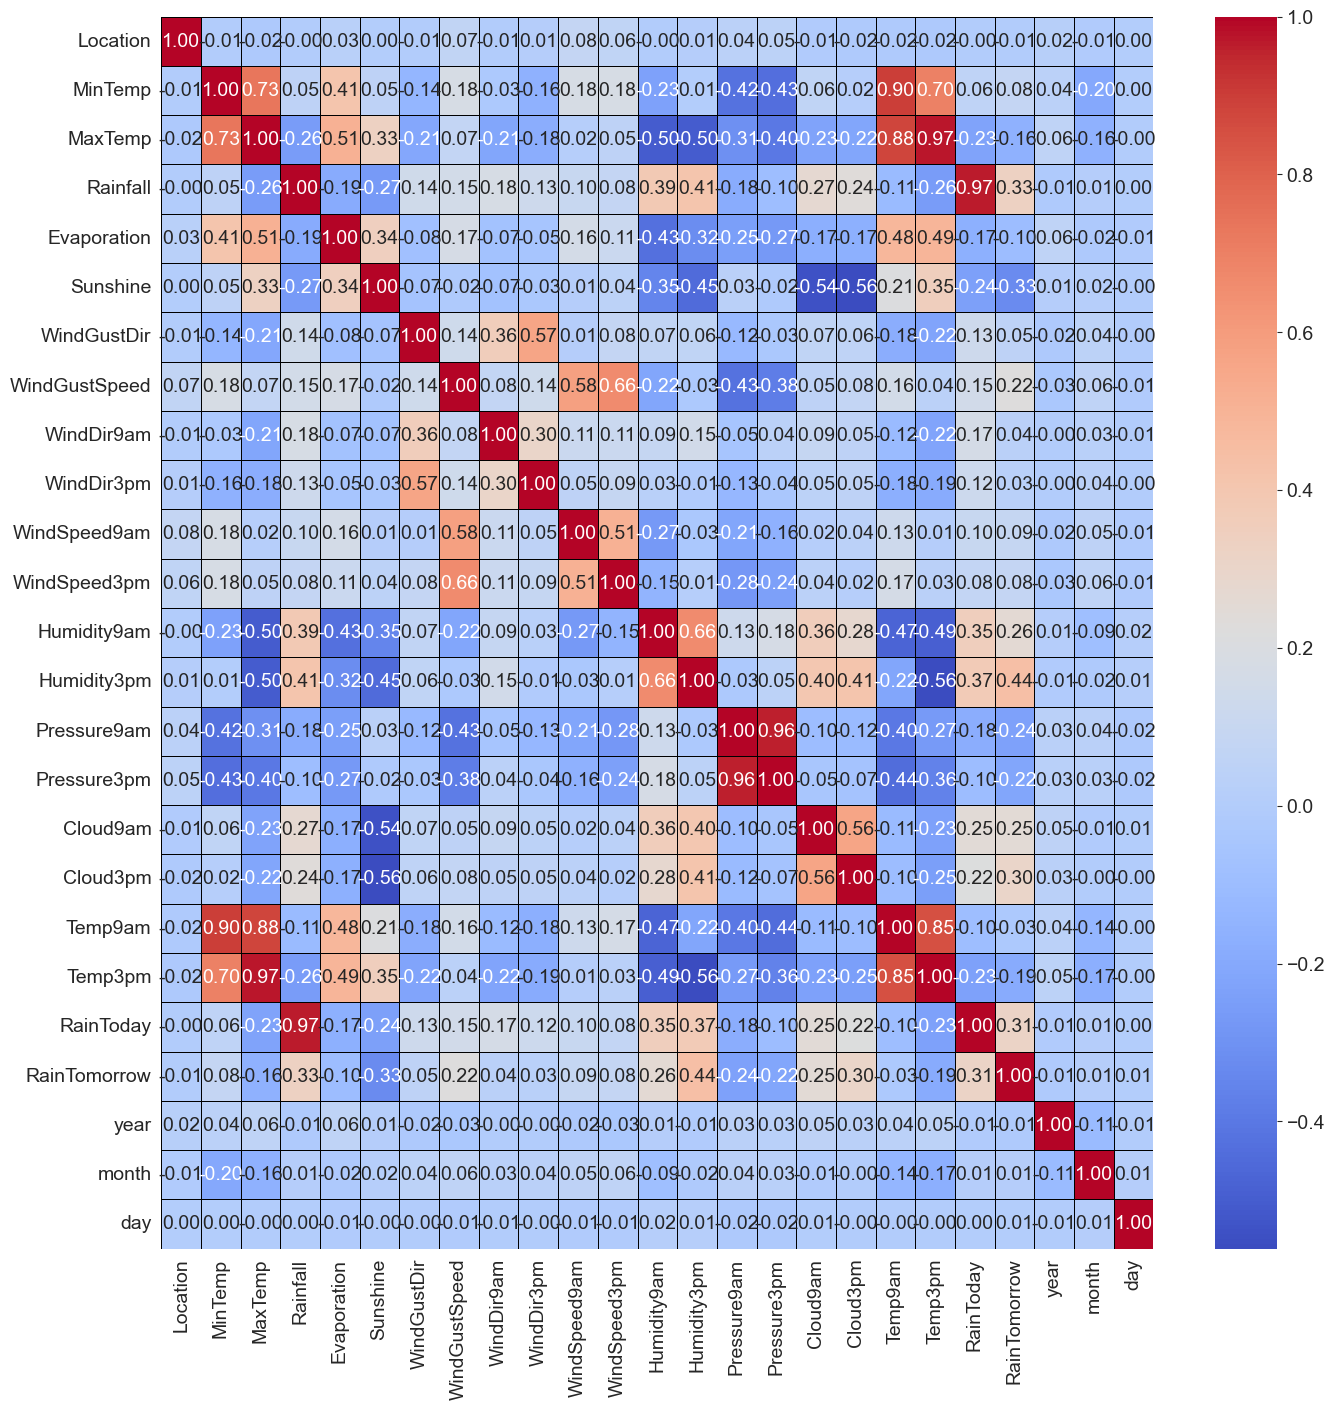

In [45]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidth=0.5, linecolor="Black", cmap="coolwarm")
plt.show()

Dari heatmap di atas, dapat diketahui bahwa: 

- `"MaxTemp"` dan `"Temp3pm"` memiliki korelasi yang tinggi dengan koefisien 0.97
- `"Pressure9am"` dan `"Pressure3pm"` memiliki korelasi yang tinggi dengan koefisien 0.96

Karena itu, akan di-drop salah satu kolom, yaitu kolom `"Temp3pm", "Pressure3pm"`

In [46]:
df.drop(["Temp3pm","Pressure3pm"], axis=1, inplace=True)

Karena 'year', 'month', dan 'day' tidak digunakan dalam pembuatan model maka drop 

In [47]:
df.drop(["year", "month", "day"], axis=1, inplace=True)

In [48]:
df.reset_index(drop=True, inplace=True)

# Data Preprocessing

## Feature Selection

Untuk proses awal data processing akan dilakukan pemilihan fitur-fitur terbaik. Jumlah fitur yang akan dipilih adalah sejumlah 10 fitur. 

Fitur dipilih menggunakan pustaka sklearn dengan `SequentialFeatureSelector as SFS`. Di mana, pada setiap iterasi, SFS akan memilih fitur baru terbaik untuk ditambahkan ke fitur yang dipilih berdasarkan skor cross-validation. Jadi, dengan menggunakan SFS kita akan mendapatkan fitur yang paling informatif untuk digunakan dalam pemodelan ini.

In [49]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Load the dataset
X = df.drop(["RainTomorrow"], axis=1)
y = df['RainTomorrow']

# feature selection
selector = LogisticRegression() 
sfs = SFS(selector, n_features_to_select=10)

In [50]:
sfs.fit(X, y)

# Mendapatkan 10 feature yang dipilih
sfs.get_feature_names_out()

array(['Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity3pm', 'Pressure9am', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'RainToday'], dtype=object)

Kemudian, kesepuluh fitur tersebut akan di-save ke dalam `X_new`

In [51]:
X_new = df[['Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity3pm', 'Pressure9am', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'RainToday','RainTomorrow']]
X_new.head()

Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity3pm  \
0       0.6           44.0          20.0          24.0         22.0   
1       0.0           44.0           4.0          22.0         25.0   
2       0.0           46.0          19.0          26.0         30.0   
3       0.0           24.0          11.0           9.0         16.0   
4       1.0           41.0           7.0          20.0         33.0   

   Pressure9am  Cloud9am  Cloud3pm  Temp9am  RainToday  RainTomorrow  
0       1007.7  8.000000   4.49925     16.9          0             0  
1       1010.6  4.431161   4.49925     17.2          0             0  
2       1007.6  4.431161   2.00000     21.0          0             0  
3       1017.6  4.431161   4.49925     18.1          0             0  
4       1010.8  7.000000   8.00000     17.8          0             0

Selanjutnya X_new akan digunakan sebagai dataset untuk splitting data

## For Logistic Regression

### Train-Test Split & Handling Imbalanced Classes

Dataset akan dibagi menjadi dua subset, yaitu data latih (train) dan data uji (test) dan juga akan dilakukan penanganan untuk data tidak seimbang (imbalanced)

In [52]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

Pada untuk logistic regression, digunakan resample untuk menangani kelas yang tidak seimbang dikarenan upsampling dengan resample memiliki hasil evaluasi yang lebih baik dibandingkan SMOTE setelah dicoba keduanya.

In [53]:
X = X_new.drop(["RainTomorrow"], axis=1)    # Features
y = X_new['RainTomorrow']                   # Target variable

# Split the data into training and testing sets
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.2, random_state=42)

# Upsample the minority class in the training set
minority_class = X_new[X_new['RainTomorrow'] == 1]
majority_class = X_new[X_new['RainTomorrow'] == 0]
minority_class_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)
data_upsampled = pd.concat([majority_class, minority_class_upsampled])

# Separate features and target variable in the upsampled dataset
X_train_lr = data_upsampled.drop('RainTomorrow', axis=1)
y_train_lr = data_upsampled['RainTomorrow']


### Feature Scalling

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test sets
X_train_lr = scaler.fit_transform(X_train_lr)
X_test_lr = scaler.transform(X_test_lr)

## For SVM

### Train-Test Split & Handling Imbalanced Classes

Dataset akan dibagi menjadi dua subset, yaitu data latih (train) dan data uji (test) dan juga akan dilakukan penanganan untuk data tidak seimbang (imbalanced).

Pada data SVM, digunakan SMOTE untuk menangani kelas tidak seimbang. Hal ini karena SMOTE lebih mudah digunakan setelah proses subsampling (setelah splitting data) dibandingkan dengan upsampling dengan resample.

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

X = X_new.drop(["RainTomorrow"], axis=1)    # Features
y = X_new['RainTomorrow']                   # Target variable

# Subsample the data
X_subsample, _, y_subsample, _ = train_test_split(X, y, train_size=0.1, random_state=42)

# Create a train-test split on the subsample
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_subsample, y_subsample, test_size=0.2, random_state=42)

# Upsample the minority class using SMOTE only on the training set
smote = SMOTE(random_state=42)
X_train_svm, y_train_svm = smote.fit_resample(X_train_svm, y_train_svm)

### Feature Scalling

In [57]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test sets
X_train_svm = scaler.fit_transform(X_train_svm)
X_test_svm = scaler.transform(X_test_svm)

# Model Definition & Model Training

## Logistic Regression

In [58]:
# import pustaka LogisticRegression dan SVM
from sklearn.linear_model import LogisticRegression

In [59]:
# Mendefinisikan model logistic regression
logreg_model= LogisticRegression(random_state=42)

In [60]:
# training the model
logreg_model.fit(X_train_lr, y_train_lr)

LogisticRegression(random_state=42)

In [61]:
y_pred_logreg = logreg_model.predict(X_test_lr)

## SVM

In [62]:
# Create an SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

In [63]:
# Train the model on the subsample
svm_model.fit(X_train_svm, y_train_svm)

SVC(kernel='linear', random_state=42)

In [64]:
y_pred_svm = svm_model.predict(X_test_svm)

# Model Evaluation

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

## Logistic Regression

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85     21897
           1       0.51      0.76      0.61      6261

    accuracy                           0.78     28158
   macro avg       0.71      0.77      0.73     28158
weighted avg       0.83      0.78      0.80     28158

Logistic Regression Model Evaluation:
Accuracy: 0.7822998792527879
Precision: 0.5069777351656546
Recall: 0.760102220092637
F1 Score: 0.6082566462167689


Text(29.22222222222222, 0.5, 'Actual class')

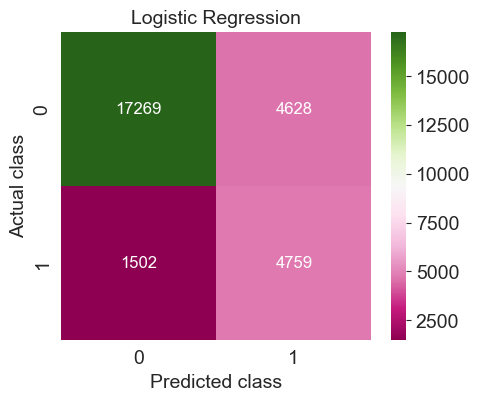

In [66]:
# Evaluate the model
accuracy_logreg = accuracy_score(y_test_lr, y_pred_logreg)
classification_report_logistic = classification_report(y_test_lr, y_pred_logreg)
precision_logreg = precision_score(y_test_lr, y_pred_logreg)
recall_logreg = recall_score(y_test_lr, y_pred_logreg)
f1_logreg = f1_score(y_test_lr, y_pred_logreg)

print(f"Classification Report for Logistic Regression:\n{classification_report_logistic}")

# Display Logistic Regression model evaluation metrics
print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy_logreg)
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)
print("F1 Score:", f1_logreg)

# Confusion matrix
conf_matrix = confusion_matrix(y_test_lr, y_pred_logreg)

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="PiYG", annot_kws={"fontsize":12})
plt.title("Logistic Regression", fontsize=14)
plt.xlabel("Predicted class")
plt.ylabel("Actual class")


Berdasarkan hasil evaluasi model di atas, didapatkan:
- Accuracy (0.7823): menunjukkan bahwa model tersebut membuat prediksi yang benar pada sebagian besar datase sebesar 78.23%
- Precision: untuk kelas 0 memiliki presisi prediksi sebesar 0.92 atau 92%. Sementara itu, untuk kelas 1 memiliki presisi prediksi sebesar 0.51 atau 51%.
- Recall (0.7601): menunjukkan bahwa model menangkap sekitar 76,0% kejadian saat hujan sebenarnya.
- F1-Score (0.6082): merupakan harmonic mean dari precision dan recall. Sekitar 60.8%, yang menunjukkan kesimbangan antara precision dan recall  
- Model logistic regression menunjukkan presisi yang baik untuk "Tidak hujan" tetapi kurang untuk "hujan".

Dari heatmap confusion matrix didapatkan:
- True Negative = 17269 (diprediksi tidak akan hujan dan benar tidak hujan) 
- False Negative = 1502 (diprediksi tidak akan hujan akan tetapi hujan) 
- True Positive = 4759 (diprediksi akan hujan dan benar hujan) 
- False Positive = 4628  (diprediksi akan hujan akan tetapi tidak hujan) 

## SVM

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86      2172
           1       0.54      0.74      0.62       644

    accuracy                           0.80      2816
   macro avg       0.73      0.78      0.74      2816
weighted avg       0.83      0.80      0.81      2816

SVM Model Evaluation:
Accuracy: 0.7961647727272727
Precision: 0.5397727272727273
Recall: 0.7375776397515528
F1 Score: 0.6233595800524935


Text(29.22222222222222, 0.5, 'Actual class')

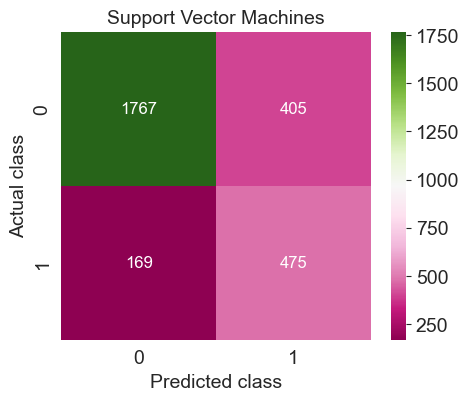

In [67]:
# Evaluate the model
accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)
classification_report_svm = classification_report(y_test_svm, y_pred_svm)
precision_svm = precision_score(y_test_svm, y_pred_svm)
recall_svm = recall_score(y_test_svm, y_pred_svm)
f1_svm = f1_score(y_test_svm, y_pred_svm)

print(f"Classification Report for SVM:\n{classification_report_svm}")

# Display Logistic Regression model evaluation metrics
print("SVM Model Evaluation:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test_svm, y_pred_svm)

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="PiYG", annot_kws={"fontsize":12})
plt.title("Support Vector Machines", fontsize=14)
plt.xlabel("Predicted class")
plt.ylabel("Actual class")


Berdasarkan hasil evaluasi model di atas, didapatkan:
- Accuracy (0.7962): menunjukkan bahwa model tersebut membuat prediksi yang benar pada sebagian besar datase sebesar 79.62%
- Precision: untuk kelas 0 memiliki presisi prediksi sebesar 0.91 atau 91%. Sementara itu, untuk kelas 1 memiliki presisi prediksi sebesar 0.54 atau 54%.
- Recall (0.7376): menunjukkan bahwa model menangkap sekitar 73.76% kejadian saat hujan sebenarnya.
- F1-Score (0.6234): merupakan harmonic mean dari precision dan recall. Sekitar 62.34%, yang menunjukkan kesimbangan antara precision dan recall  
- Model logistic regression menunjukkan presisi yang baik untuk "Tidak hujan" tetapi kurang untuk "hujan".


Dari heatmap confusion matrix didapatkan:
- True Negative = 1767 (diprediksi tidak akan hujan dan benar tidak hujan) 
- False Negative = 169 (diprediksi tidak akan hujan akan tetapi hujan) 
- True Positive = 475 (diprediksi akan hujan dan benar hujan) 
- False Positive = 405  (diprediksi akan hujan akan tetapi tidak hujan) 

F1-Score pada model SVM yang bernilai 0.6234 lebih tinggi dibandingkan dengan model Logistic Regression yang bernilai 0.6082, serta memiliki rata-rata presisi dan akurasi yang lebih besar. 

Sehingga dalam hal ini, model SVM menghasilkan performa yang lebih baik dalam evaluasi modelnya.

## SVM vs Logistic Regression

In [68]:
# Model evaluation for logistic regression
print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy_logreg)
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)
print("F1 Score:", f1_logreg)

print("==========")
# Model evaluation for SVM
print("SVM Model Evaluation:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)

Logistic Regression Model Evaluation:
Accuracy: 0.7822998792527879
Precision: 0.5069777351656546
Recall: 0.760102220092637
F1 Score: 0.6082566462167689
SVM Model Evaluation:
Accuracy: 0.7961647727272727
Precision: 0.5397727272727273
Recall: 0.7375776397515528
F1 Score: 0.6233595800524935


# Model Improvement 

## Hyperparameter Tuning

In [69]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

In [70]:
# define model/create instance
lr=LogisticRegression()

#Setting the range for class weights
weights = np.linspace(0.0,0.99,500)

#specifying all hyperparameters with possible values
param= {'C': [0.1, 0.5, 1, 10], 'penalty': ['l1', 'l2'],"class_weight":[{0:x ,1:1.0 -x} for x in weights]}

# create 3 folds
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# RandomizedSearchCV for hyperparam tuning
model_lr = RandomizedSearchCV(estimator=lr, param_distributions=param, scoring="f1", cv=folds, n_iter=10, random_state=42)

#train model to learn relationships between x and y
model_lr.fit(X_train_lr, y_train_lr)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=LogisticRegression(),
                   param_distributions={'C': [0.1, 0.5, 1, 10],
                                        'class_weight': [{0: 0.0, 1: 1.0},
                                                         {0: 0.0019839679358717435,
                                                          1: 0.9980160320641283},
                                                         {0: 0.003967935871743487,
                                                          1: 0.9960320641282565},
                                                         {0: 0.0059519038076152305,
                                                          1: 0.9940480961923848},
                                                         {0: 0.007935871743486974,
                                                          1: 0.99...
                                                          1: 0.9543687374749499},
                                                         {0: 0.047615230460921844,
                                                          1: 0.9523847695390781},
                                                         {0: 0.04959919839679359,
                                                          1: 0.9504008016032064},
                                                         {0: 0.05158316633266533,
                                                          1: 0.9484168336673346},
                                                         {0: 0.05356713426853708,
                                                          1: 0.9464328657314629},
                                                         {0: 0.055551102204408814,
                                                          1: 0.9444488977955912},
                                                         {0: 0.05753507014028056,
                                                          1: 0.9424649298597194}, ...],
                                        'penalty': ['l1', 'l2']},
                   random_state=42, scoring='f1')

In [71]:
y_pred_logreg = model_lr.predict(X_test_lr)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85     21897
           1       0.51      0.76      0.61      6261

    accuracy                           0.78     28158
   macro avg       0.71      0.77      0.73     28158
weighted avg       0.83      0.78      0.80     28158

Logistic Regression Model Evaluation:
Accuracy: 0.7831877264010229
Precision: 0.5083422459893048
Recall: 0.7591439067241654
F1 Score: 0.6089296009224264


Text(29.22222222222222, 0.5, 'Actual class')

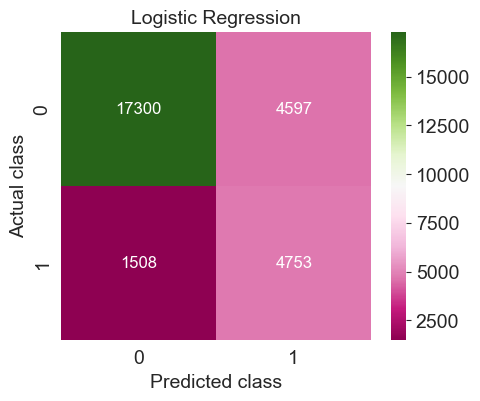

In [72]:
# Evaluate the model
accuracy_logreg = accuracy_score(y_test_lr, y_pred_logreg)
classification_report_logistic = classification_report(y_test_lr, y_pred_logreg)
precision_logreg = precision_score(y_test_lr, y_pred_logreg)
recall_logreg = recall_score(y_test_lr, y_pred_logreg)
f1_logreg = f1_score(y_test_lr, y_pred_logreg)

print(f"Classification Report for Logistic Regression:\n{classification_report_logistic}")

# Display Logistic Regression model evaluation metrics
print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy_logreg)
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)
print("F1 Score:", f1_logreg)

# Confusion matrix
conf_matrix = confusion_matrix(y_test_lr, y_pred_logreg)

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="PiYG", annot_kws={"fontsize":12})
plt.title("Logistic Regression", fontsize=14)
plt.xlabel("Predicted class")
plt.ylabel("Actual class")

Terdapat beberapa hal sedikit berbeda dibandingkan dengan model Logistic Regression yang asli:
- skor F1 pada model yang baru adalah 0.6089, sementara model yang asli adalah 0.6082
- kemudian akurasi pada model yang baru adalah 78.32%, sementara model yang asli adalah 78.23%
- presisi pada model yang baru 50.83%, sementara model yang asli adalah 50.70%
- recall pada model yang baru bernilai 0.7591, sementara model yang asli adalah 0.7601

Akan tetapi, pada model yang baru memiliki lebih sedikit False Negative (diprediksi tidak akan hujan akan tetapi hujan).

Dikarenakan tidak terdapat perbedaan yang signifikan dan model yang asli lebih sederhana maka model yang akan digunakan adalah model yang asli. 

# Model Inference

In [73]:
X_new.head()

Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity3pm  \
0       0.6           44.0          20.0          24.0         22.0   
1       0.0           44.0           4.0          22.0         25.0   
2       0.0           46.0          19.0          26.0         30.0   
3       0.0           24.0          11.0           9.0         16.0   
4       1.0           41.0           7.0          20.0         33.0   

   Pressure9am  Cloud9am  Cloud3pm  Temp9am  RainToday  RainTomorrow  
0       1007.7  8.000000   4.49925     16.9          0             0  
1       1010.6  4.431161   4.49925     17.2          0             0  
2       1007.6  4.431161   2.00000     21.0          0             0  
3       1017.6  4.431161   4.49925     18.1          0             0  
4       1010.8  7.000000   8.00000     17.8          0             0

In [74]:
model_inference = {'Rainfall':[0.74354, 0.3232],
                   'WindGustSpeed':[33.56, 54.235],
                   'WindSpeed9am':[8.263, 32.23],
                   'WindSpeed3am':[9.643, 12.649],
                   'Humidity3am':[13.4533, 23.4544],
                   'Pressure9am':[1434.8, 1644.9],
                   'Cloud9am':[8.5522, 20.5333],
                   'Cloud3pm':[5.4544, 13.4354],
                   'Temp9am':[20, 16],
                   'RainToday':[0, 1]}

# Membuat dataframe dari model inference
model_inference = pd.DataFrame(model_inference)
model_inference

Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3am  Humidity3am  \
0   0.74354         33.560         8.263         9.643      13.4533   
1   0.32320         54.235        32.230        12.649      23.4544   

   Pressure9am  Cloud9am  Cloud3pm  Temp9am  RainToday  
0       1434.8    8.5522    5.4544       20          0  
1       1644.9   20.5333   13.4354       16          1

In [75]:
# Create an SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_svm, y_train_svm)

SVC(kernel='linear', random_state=42)

In [76]:
# Predicting new data
predict_with_svm = svm_model.predict(model_inference)
predict_with_svm

array([0, 0], dtype=int64)

Maka dengan nilai pada `model_inference` diprediksi bahwa tidak akan turun hujan untuk keduanya.

# Conclusion

Dari langkah-langkah yang telah dilakukan dapat ditarik kesimpulan bahwa:
- MinTemp memiliki suhu minimum antara -8.5 hingga 33.9 dan pada MaxTemp memiliki suhu terpanas 48.1 derajat.
- variabel target `'RainTomorrow'` memiliki lebih banyak nilai `No`, yaitu sebanyak 109586 dibandingkan nilai `Yes` yang berjumlah 31201. Karena itu, akan dilakukan penanganan kelas tidak seimbang (imbalanced) dengan resample untuk upsampling dan SMOTE.
- Wilayah Portland, Walpole, Cairns memiliki kemungkinan hujan lebih tinggi dibandingkan dengan wilayah lainnya. 
- Baik rata-rata curah hujan maupun kemungkinan frekuensi hujan, pada bulan ke-6 (Juni), 7 (Juli), dan 8 (Agustus) lebih tinggi dibandingkan dengan bulan lainnya.
- Berdasarkan seleksi fitur terbaik menggunakan Sequential Feature Slection (SFS), didapatkan 10 fitur, yaitu: `'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm','Humidity3pm', 'Pressure9am', 'Cloud9am', 'Cloud3pm', 'Temp9am','RainToday'` dengan variabel target `'RainTomorrow`.
- Pada kasus ini, pemodelan dengan algoritma Support Vector Machine (SVM) memiliki performa yang lebih baik dibandingkan dengan Logistic Regression. Dengan F1-Score pada model SVM yang bernilai 0.6234 lebih tinggi dibandingkan dengan model Logistic Regression yang bernilai 0.6082, serta memiliki rata-rata presisi dan akurasi yang lebih besar. 
- Pada langkah model inference menghasilkan [0, 0], yang menujukkan bahwa diprediksi tidak akan terjadi hujan.